In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
physical_devices = tf.config.list_physical_devices("GPU")


In [3]:
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2021-09-15 18:25:08.635070: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-09-15 18:25:08.635259: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


True

Metal device set to: Apple M1


In [5]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        './Dataset/train',  
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='sparse')

Found 1506 images belonging to 3 classes.


In [7]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [20]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
validation_datagen   = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
        './Dataset/val',
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='sparse')

Found 215 images belonging to 3 classes.


In [10]:
test_datagen   = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        './Dataset/test',
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='sparse')

Found 431 images belonging to 3 classes.


In [11]:
model = tf.keras.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        3

2021-09-15 18:25:15.503733: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-09-15 18:25:15.503781: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=50,
)

2021-09-15 18:25:20.014328: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-09-15 18:25:20.014498: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-09-15 18:25:20.164492: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/50
47/47 [==============================] - ETA: 0s - loss: 0.9196 - accuracy: 0.4878

2021-09-15 18:25:31.172190: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 12s 237ms/step - loss: 0.9196 - accuracy: 0.4878 - val_loss: 0.8657 - val_accuracy: 0.4792
Epoch 2/50
47/47 [==============================] - 11s 232ms/step - loss: 0.8463 - accuracy: 0.5326 - val_loss: 0.9408 - val_accuracy: 0.5417
Epoch 3/50
47/47 [==============================] - 11s 232ms/step - loss: 0.7310 - accuracy: 0.6533 - val_loss: 0.9335 - val_accuracy: 0.6354
Epoch 4/50
47/47 [==============================] - 11s 236ms/step - loss: 0.6243 - accuracy: 0.7374 - val_loss: 0.8416 - val_accuracy: 0.4635
Epoch 5/50
47/47 [==============================] - 12s 241ms/step - loss: 0.6470 - accuracy: 0.7198 - val_loss: 0.6064 - val_accuracy: 0.7448
Epoch 6/50
47/47 [==============================] - 12s 249ms/step - loss: 0.5266 - accuracy: 0.7890 - val_loss: 0.6495 - val_accuracy: 0.6823
Epoch 7/50
47/47 [==============================] - 12s 259ms/step - loss: 0.4744 - accuracy: 0.8202 - val_loss: 0.4238 - val_accuracy: 0.8177
Epoch 8/50

In [14]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 1s 102ms/step - loss: 0.2983 - accuracy: 0.9118


In [15]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 47}

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

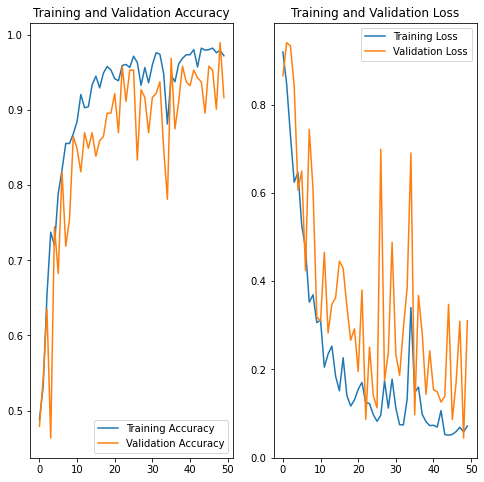

In [17]:
EPOCHS = 50

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

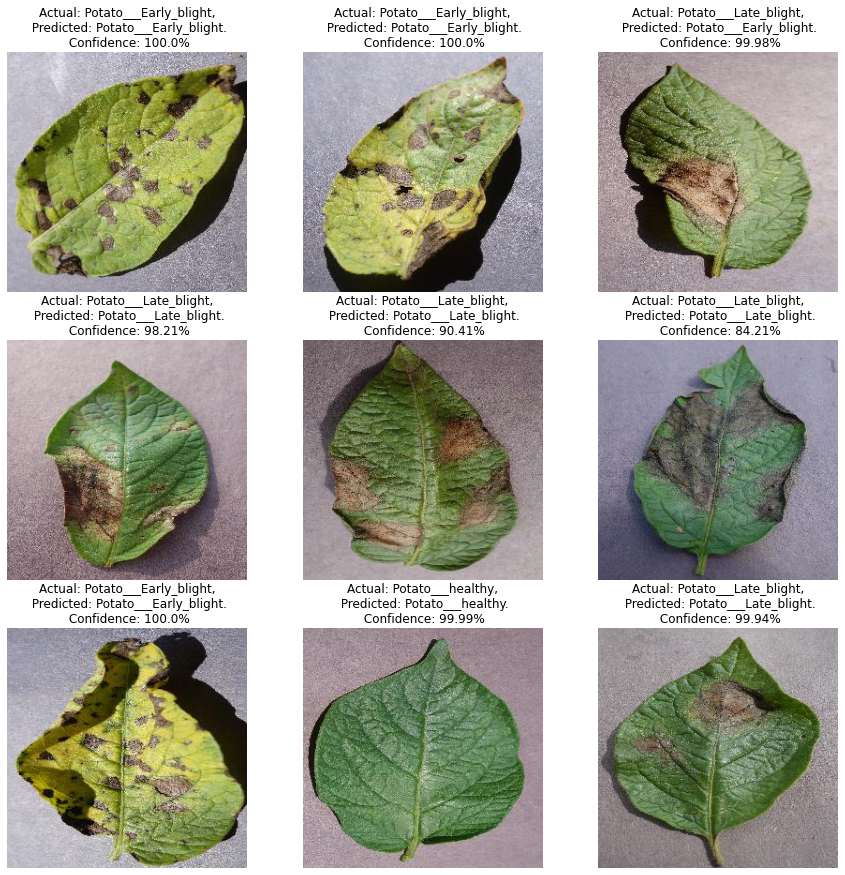

In [21]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [22]:
model.save("saved_model")


2021-09-15 18:38:05.027652: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: saved_model_2/assets


In [23]:
m = tf.keras.models.load_model('saved_model')

In [24]:
image = tf.keras.preprocessing.image.load_img('download.png', target_size=(256, 256))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = m.predict(input_arr)

2021-09-15 18:38:09.870899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [25]:
print(predictions)

[[1. 0. 0.]]
